<a href="https://colab.research.google.com/github/NatashaKamami/Python-Data-Analysis/blob/main/LifeExpectancy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**


In [ ]:
!pip install fiona

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import pyogrio
import fiona
import geopandas as gpd


#**Loading the data**

In [ ]:
life_expectancy = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
life_expectancy.head(30)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


#**Overview of the data**

In [ ]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
life_expectancy['Year'] = pd.to_datetime(life_expectancy['Year'].astype(str), format='%Y')

In [ ]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
percentage = (life_expectancy.isnull().sum() / len(life_expectancy)) * 100
percentage

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


#**Data Cleaning**

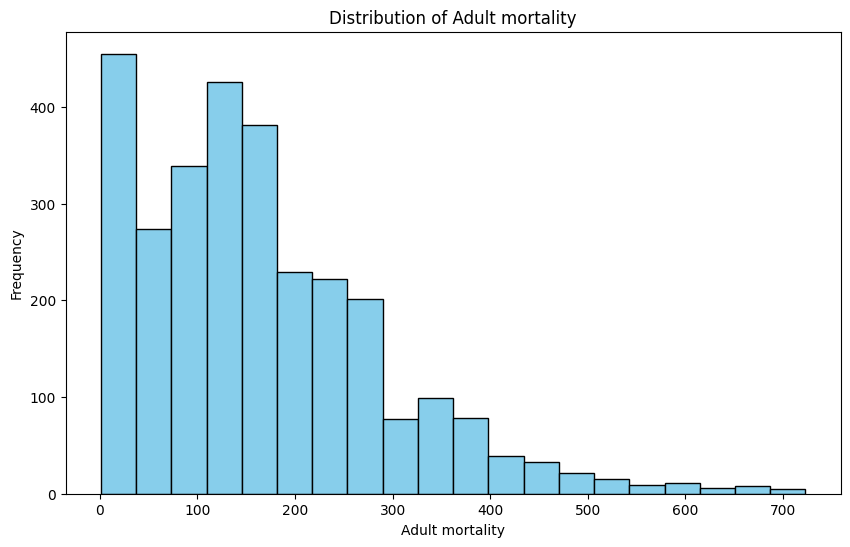

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(life_expectancy['Adult Mortality'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Adult mortality')
plt.xlabel('Adult mortality')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Imputing missing values using mean or median
life_expectancy['Adult Mortality'] = life_expectancy['Adult Mortality'].fillna(life_expectancy['Adult Mortality'].median())
life_expectancy['Life expectancy '] = life_expectancy['Life expectancy '].fillna(life_expectancy['Life expectancy '].median())
life_expectancy['Alcohol'] = life_expectancy['Alcohol'].fillna(life_expectancy['Alcohol'].median())
life_expectancy['Hepatitis B'] = life_expectancy['Hepatitis B'].fillna(life_expectancy['Hepatitis B'].median())
life_expectancy[' BMI '] = life_expectancy[' BMI '].fillna(life_expectancy[' BMI '].mean())
life_expectancy['Polio'] = life_expectancy['Polio'].fillna(life_expectancy['Polio'].median())
life_expectancy['Total expenditure'] = life_expectancy['Total expenditure'].fillna(life_expectancy['Total expenditure'].mean())
life_expectancy['Diphtheria '] = life_expectancy['Diphtheria '].fillna(life_expectancy['Diphtheria '].median())
life_expectancy['GDP'] = life_expectancy['GDP'].fillna(life_expectancy['GDP'].median())
life_expectancy[' thinness  1-19 years'] = life_expectancy[' thinness  1-19 years'].fillna(life_expectancy[' thinness  1-19 years'].median())
life_expectancy[' thinness 5-9 years'] = life_expectancy[' thinness 5-9 years'].fillna(life_expectancy[' thinness 5-9 years'].median())
life_expectancy['Income composition of resources'] = life_expectancy['Income composition of resources'].fillna(life_expectancy['Income composition of resources'].median())
life_expectancy['Schooling'] = life_expectancy['Schooling'].fillna(life_expectancy['Schooling'].median())

# Impute missing values in the Population column with the median of each Country group
life_expectancy['Population'] = life_expectancy.groupby('Country')['Population'].transform(lambda x: x.fillna(x.median()))

# Forward fill and backward fill within each country
life_expectancy.sort_values(['Country', 'Year'], inplace=True)
life_expectancy['Population'] = life_expectancy.groupby('Country')['Population'].ffill().bfill()


In [ ]:
life_expectancy.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
url = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_0_sovereignty.geojson"
gdf = gpd.read_file(url)
gdf

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 sovereignty,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 sovereignty,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,1,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,...,Asia,Western Asia,Middle East & North Africa,20,20,6,-99,1,Admin-0 sovereignty,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,1,2,Argentina,ARG,0,2,Sovereign country,Argentina,ARG,0,...,Americas,South America,Latin America & Caribbean,9,9,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,0,...,Oceania,Melanesia,East Asia & Pacific,7,7,4,2,1,Admin-0 sovereignty,"MULTIPOLYGON (((167.84488 -16.46633, 167.51518..."
167,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 sovereignty,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
168,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 sovereignty,"POLYGON ((31.521 -29.25739, 31.32556 -29.40198..."
169,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 sovereignty,"POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,..."


In [ ]:
new_data=life_expectancy.merge(gdf, how='inner', right_on='admin', left_on='Country')

In [ ]:
dropping = ['scalerank', 'labelrank', 'sovereignt', 'sov_a3', 'adm0_dif', 'level',
       'type', 'admin', 'adm0_a3', 'geou_dif', 'geounit', 'gu_a3', 'su_dif',
       'subunit', 'su_a3', 'brk_diff', 'name', 'name_long', 'brk_a3',
       'brk_name', 'brk_group', 'abbrev', 'postal', 'formal_en', 'formal_fr',
       'note_adm0', 'note_brk', 'name_sort', 'name_alt', 'mapcolor7',
       'mapcolor8', 'mapcolor9', 'mapcolor13', 'pop_est', 'gdp_md_est',
       'pop_year', 'lastcensus', 'gdp_year', 'economy', 'income_grp',
       'wikipedia', 'fips_10', 'iso_a2', 'iso_a3', 'iso_n3', 'un_a3', 'wb_a2',
       'wb_a3', 'woe_id', 'adm0_a3_is', 'adm0_a3_us', 'adm0_a3_un',
       'adm0_a3_wb', 'continent', 'region_un', 'subregion', 'region_wb',
       'name_len', 'long_len', 'abbrev_len', 'tiny', 'homepart',
       'featureclass']

new_data.drop(columns=dropping, inplace=True)

In [ ]:
new_data = gpd.GeoDataFrame(new_data, geometry='geometry')

# **Problem statement:**  Taking a look at how life expectancy differs in various countries and focusing on the reasons behind this disparity.

#**Global life expectancy by country**
The map looks at the level of life expectancy for each country in the world.

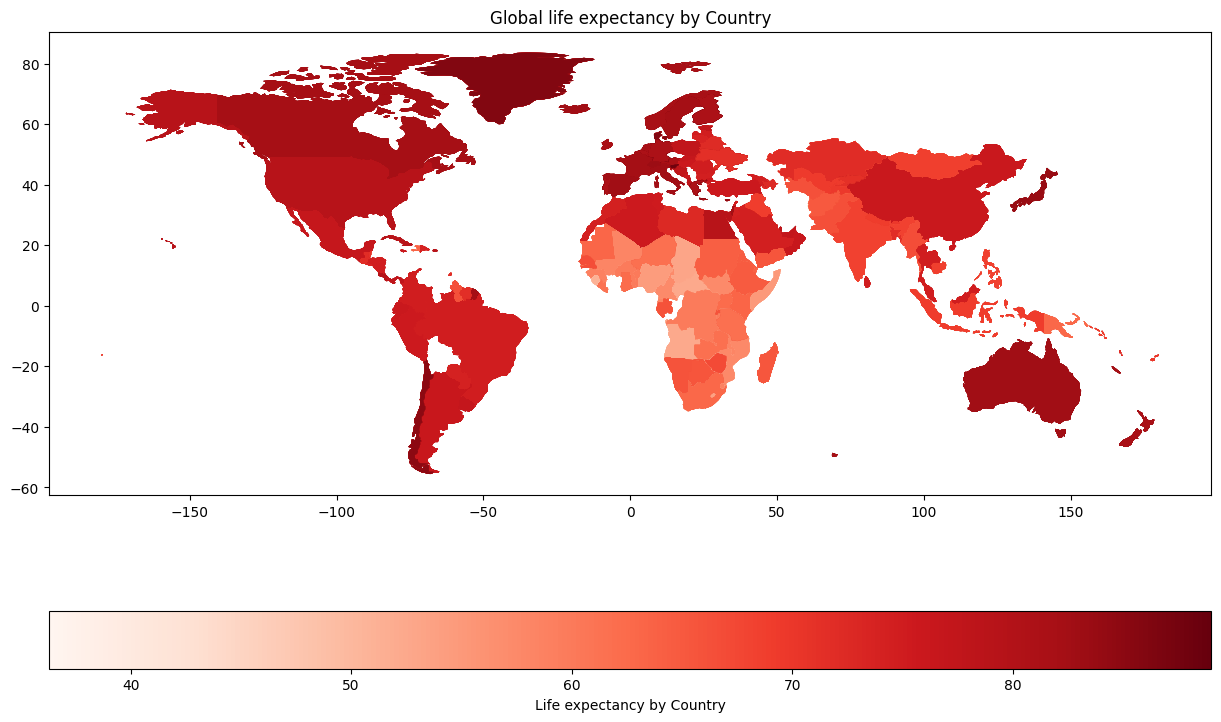

In [ ]:
fig, ax=plt.subplots(1, 1, figsize=(15,10))
new_data.plot(column='Life expectancy', ax=ax, legend=True, cmap='Reds', legend_kwds={'label': "Life expectancy by Country",
                                                                                         'orientation': "horizontal"})
plt.title('Global life expectancy by Country')
plt.show()

# **Overall analysis of correlation of the various factors in the dataset**
My focus will be on life expectancy and factors related to it. From the heatmap, we can see that a number of factors either possess a strong positive correlation or a strong negative correlation with Life expectancy. I will focus on the following factors; Schooling, Income composition of resources, GDP, HIV/AIDS, BMI and Adult mortality.

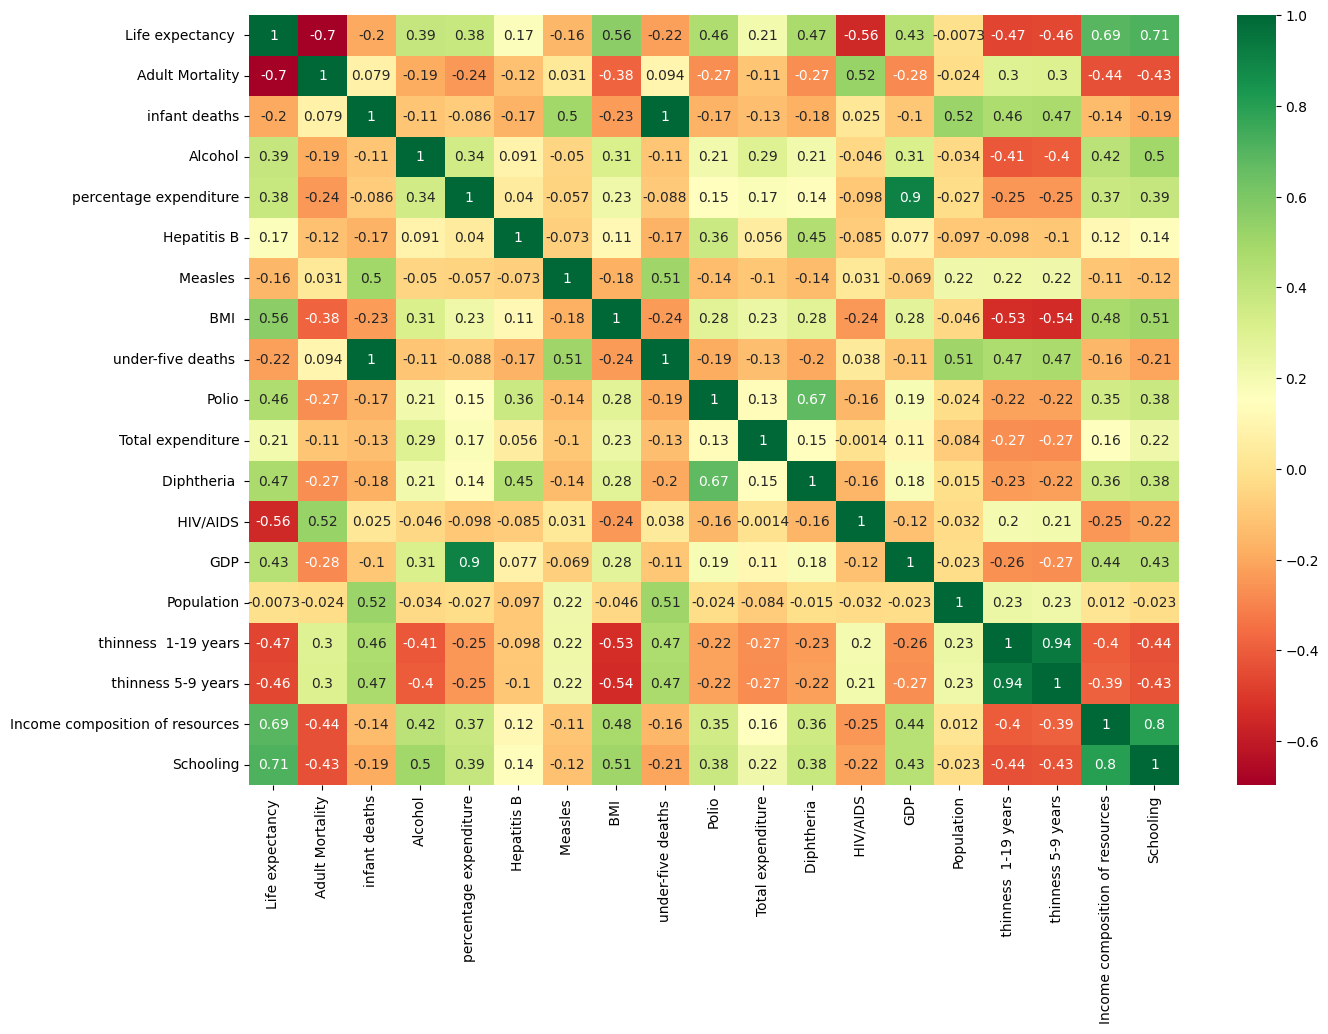

In [ ]:
# Heatmap to show correlation between factors
plt.figure(figsize=(15,10))
sns.heatmap(life_expectancy.corr(numeric_only=True),annot=True,cmap='RdYlGn')
plt.show()

# **Impact of Related Factors on Life Expectancy**
####**1. Impact of socioeconomic factors**
This analysis examines how socioeconomic indicators like GDP, Schooling and Income composition of resources correlate with Life Expectancy. We can see that all the above factors have a positive correlation with life expectancy which means that high GDP, high schooling or high income composition of resources leads to high life expectancy levels as well. I will now use scatter plots to investigate the specific relationships between each factor and life expectancy.




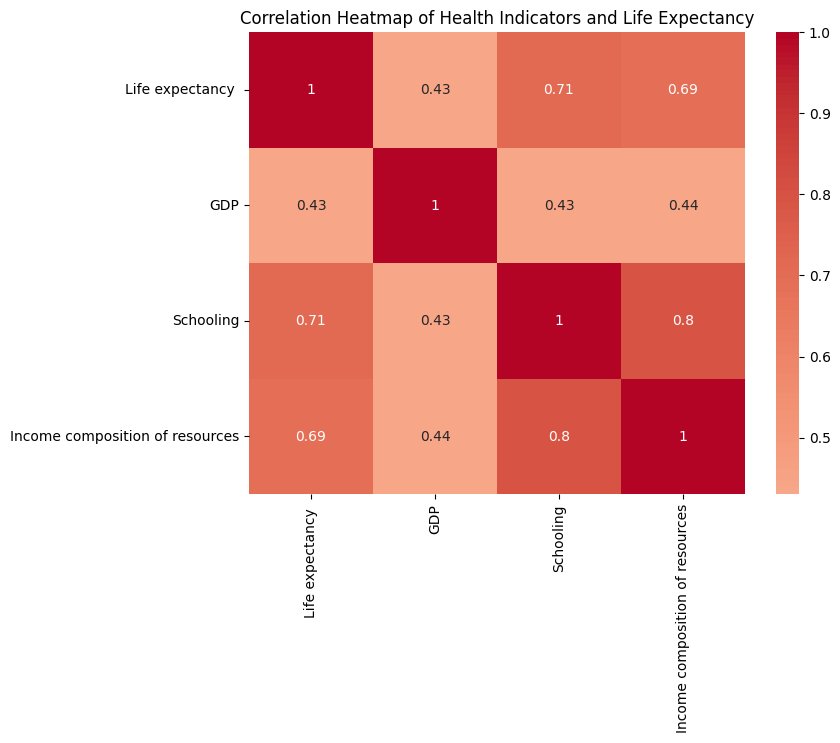

In [ ]:
# Correlation Heatmap for detailed insight
social_factors = life_expectancy[['Life expectancy ', 'GDP', 'Schooling', 'Income composition of resources']]
plt.figure(figsize=(8, 6))
sns.heatmap(social_factors.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Health Indicators and Life Expectancy')
plt.show()

In [ ]:
# Defining the variables for each subplot
variables = [
    ("GDP", "Life Expectancy vs GDP", "GDP"),
    ("Schooling", "Life Expectancy vs Schooling", "Schooling"),
    ("Income composition of resources", "Life Expectancy vs Income Composition of Resources", "Income Composition of Resources")]

# Create a 1x3 subplot figure
fig = make_subplots(rows=1, cols=3, subplot_titles=[title for _, title, _ in variables])

# Loop through each variable to create subplots with axis titles
for i, (x, title, x_title) in enumerate(variables, start=1):
    scatter_fig = px.scatter(
        life_expectancy, x=x, y="Life expectancy ", color="Status",
        hover_data=["Country", "Year"]
    )
    for trace in scatter_fig.data:
        fig.add_trace(trace, row=1, col=i)

    # Set axis titles for each subplot
    fig.update_xaxes(title_text=x_title, row=1, col=i)
    fig.update_yaxes(title_text="Life Expectancy", row=1, col=i)

# layout
fig.update_layout(height=500, width=1500, title_text="Comparison of Factors Influencing Life Expectancy")
fig.show()


The scatter plots provide a genaeral view of how socialeconomic factors relate to life expectancy across different countries grouped by status, helping us identify the presence of clusters and outliers. The clusters in the plots represent subsets of our data that share common characteristics, behaviours and conditions i.e developing countries and developed countries. Here’s a breakdown of the key insights from each plot:

1. **GDP vs. Life Expectancy**: The scatter plot reveals that most developed countries have both high GDP levels and high life expectancy, while developing countries typically show lower values for both. This suggests an association between GDP and life expectancy. Meaning that countries with higher GDP levels tend to have longer life expectancies and those with lower GDP levels tend to have shorter life expectancies. Notable outliers in this plot include Luxembourg and Equatorial Guinea.

2. **Schooling vs. Life Expectancy**: In this plot, developed countries tend to have higher schooling years (generally between 12 and 20 years) as well as higher life expectancy, supporting the idea that more years of schooling are linked to longer life expectancies. In contrast, most developing countries show lower values for both schooling and life expectancy. Haiti stands out as an outlier here with low life expectancy and countries like south sudan as an outlier with low schooling.

3. **Income Composition of Resources vs. Life Expectancy**: This plot shows that countries with a high income composition are often developed nations, and they also tend to have higher life expectancy. Conversely, most developing countries have lower income composition values and shorter life expectancies. Haiti again appears as an outlier here for life expectancy and countries such as south sudan for income composition of resources.

Since Haiti stands out as an outlier with very low life expectancy in the plots, it would be insightful to investigate whether Haiti is indeed among the lowest-ranking countries in life expectancy. Additionally, examining its trends in life expectancy and related factors over time could provide a deeper understanding of the challenges affecting its life expectancy.

###**2. Impact of health factors on Life Expectancy**
This analysis explores relationships between health indicators like Adult Mortality, BMI, HIV/AIDS prevalence on Life Expectancy. We can see that HIV/AIDS and Adult mortality have a negative relationship with Life expectancy while BMI has a positive correlation. This means that high HIV/AIDS prevelance and high Adult mortality rates lead to lower life expectancy levels while high BMI levels lead to high life expectancy levels as well. The scatter plots below investigate the individual relationships of the factors with life expectancy.



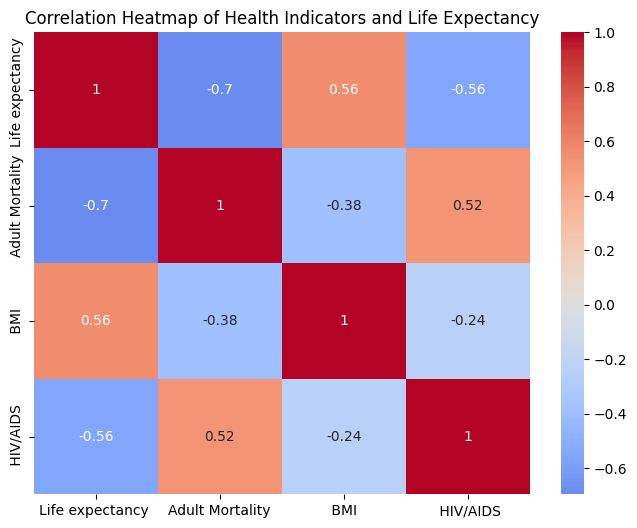

In [ ]:
# Correlation Heatmap for detailed insight
health_factors = life_expectancy[['Life expectancy ', 'Adult Mortality', ' BMI ', ' HIV/AIDS']]
plt.figure(figsize=(8, 6))
sns.heatmap(health_factors.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Health Indicators and Life Expectancy')
plt.show()


In [ ]:
# Defining the variables for each subplot
variables = [
    ("Adult Mortality", "Life Expectancy vs Adult Mortality", "Adult Mortality"),
    (" BMI ", "Life Expectancy vs BMI", " BMI "),
    (" HIV/AIDS", "Life Expectancy vs HIV/AIDS", " HIV/AIDS")]

# Create a 1x3 subplot figure
fig = make_subplots(rows=1, cols=3, subplot_titles=[title for _, title, _ in variables])

# Loop through each variable to create subplots with axis titles
for i, (x, title, x_title) in enumerate(variables, start=1):
    scatter_fig = px.scatter(
        life_expectancy, x=x, y="Life expectancy ", color="Status",
        hover_data=["Country", "Year"]
    )
    for trace in scatter_fig.data:
        fig.add_trace(trace, row=1, col=i)

    # Set axis titles for each subplot
    fig.update_xaxes(title_text=x_title, row=1, col=i)
    fig.update_yaxes(title_text="Life Expectancy", row=1, col=i)

# layout
fig.update_layout(height=500, width=1500, title_text="Comparison of Factors Influencing Life Expectancy")
fig.show()


The scatter plots provide a general overview of the distribution of how health factors against life expectancy are distributed according to the status of different countries. It also highlights clusters and outliers in the data. The clusters typically group countries with similar characteristics together, such as developed and developing nations.


1. **Adult Mortality vs Life Expectancy:** Most developed countries show a high life expectancy and low adult mortality. In contrast, developing countries tend to have lower life expectancy and higher adult mortality. This suggests that countries with lower adult mortality rates generally have higher life expectancy, and vice versa. Haiti is an outlier here.

2. **BMI vs Life Expectancy:** In this plot, most developed countries have higher BMIs and longer life expectancy. Even some developing countries with higher BMIs tend to have better life expectancy. This is evidence that high BMI is associated with high life expectancy. Haiti appears as an outlier in this case as well.

3. **HIV/AIDS vs Life Expectancy:** Developed countries typically have low HIV/AIDS rates and high life expectancy, while developing countries tend to have higher HIV/AIDS rates and lower life expectancy. This highlights the negative impact of HIV/AIDS on life expectancy. Haiti again stands out as an outlier in this plot.


Given that Haiti consistently ranks lower than expected in almost every plot, it raises the questions: Why does Haiti have that specific record that has such a low life expectancy compared to other countries? Is Haiti among the low ranking coutries in terms of life expectancy worlwide? It would be interesting to investigate Haiti’s life expectancy trends over the years and explore the factors that contribute to its lower-than-expected scores.

# **Looking at top and bottom ranking countries in terms of life expectancy and their trends**
This analysis first highlights different factors that affect life expectancy in both high ranking and low ranking countries in terms of life expectancy. It then examines the trend of life expectancy over time in the differnt countries.
We will see that BMI, schooling and Income composition of resources are relatively lower in the bottom 5 countries in comparison to the top 5 countries. While adult mortality and HIV/AIDS are a lot higher in the bottom 5 countries in comparison with the top 5 countries.

In [ ]:
# Calculating mean life expectancy, sorting to find top 5 countries, and filtering original data
top_country_names = life_expectancy.groupby('Country')['Life expectancy '].mean().nlargest(5).index
data_top_countries = life_expectancy[life_expectancy['Country'].isin(top_country_names)].copy()
data_top_countries.columns = data_top_countries.columns.str.strip()  # Clean column names

# Define factors and plot in a loop
for factors in [['BMI', 'Life expectancy', 'Schooling', 'Adult Mortality','Income composition of resources']]:
    new_data = data_top_countries[['Country'] + factors].melt(id_vars='Country', var_name='Factor', value_name='Value')
    fig = px.histogram(new_data, x="Country", y="Value", color="Factor", barmode="group",
                       height=400, title="Comparison of Factors for Top 5 Countries", histfunc="avg")
    fig.show()


The top five ranking countries in terms of life expectancy—Japan, France, Sweden, Switzerland, and Iceland—are all known for their high standards of living, healthcare and social systems, which impact life expectancy, adult mortality, BMI, schooling, and income composition of resources. This barchart gives us an overview of these factors and helps us see which countries lead in specific areas and those that do not. The reasons behind these rankings are:

1. **Japan**:
  - Highest in Life Expectancy: Japan has the longest life expectancy which is attributed to a combination of factors such as diet, strong healthcare systems as well as active lifestyles.
  - Low BMI: Japan’s low BMI is consistent with its health-oriented lifestyle, which emphasizes on portion control, fresh produce, and low levels of processed foods.
  -Low Schooling: Despite Japan’s high educational standards, it ranks lowest among these five countries in schooling due to slightly shorter average years of education compared to European countries which the other countries in the list happen to be a part of.

2. **France**:
   - Highest in Adult mortality: Although France has excellent healthcare and ranks high in overall life expectancy, it has higher adult mortality rates compared to its peers in this list. This could indicate higher rates of lifestyle-related diseases or deaths which are prevalent in high-income countries, especially since France has relatively high alcohol and tobacco consumption rates.
   - Lowest in Life Expectancy: Despite high healthcare standards, France ranks the lowest among these countries in life expectancy. This could be influenced by lifestyle factors as well as health-related behaviors mentioned above which contribute to higher adult mortality and impact overall life expectancy.
   - Lowest in Income Composition of Resources: While France is economically strong, it has a less favorable ranking compared to countries like Switzerland and Iceland, where economic policies emphasize wealth preservation and high personal income in comparison to France which reflects lower relative GDP per capita or greater income inequality.

3. **Sweden**:
   - Highest in BMI: Sweden has the highest average BMI among these countries. BMI is influenced by a range of factors, including diet and lifestyle. While Sweden is generally considered a healthy country, rising BMI levels reflect lifestyle shifts that include increased consumption of processed foods. Furthermore, its cold climate may also lead to slightly higher BMI levels due to dietary preferences for higher-calorie foods.

4. **Iceland**:
   - Highest in Schooling: Schooling in Iceland is free and heavily subsidized(including university education), reflecting its strong education system. Additionally, due to its small population, the government is able to allocate a high percentage of its spending to this sector.
   - Lowest in Adult Mortality: Iceland stands out with the lowest adult mortality rate among these countries, reflecting exceptional healthcare quality, another perk as a result of its small population. Additionally, the population’s active lifestyle and healthy diets contribute to lower rates of diseases which impacs adult mortality rates.
  

5. **Switzerland**:
   - Highest in Income Composition of Resources: Switzerland's high rank here reflects its stable economy, high standard of living and high GDP per capita. The country supports income equality and wealth distribution, providing citizens with access to high-quality healthcare, social services, and opportunities, which in turn positively impact well-being.

In [ ]:
# Life Expectancy Trends by Country for top 5 contries
fig = px.line(data_top_countries, x='Year', y='Life expectancy', color='Country', markers=True,
              title='Life Expectancy Trends Over Time for top 5 Countries')
fig.update_layout(xaxis_title='Year', yaxis_title='Life Expectancy')
fig.show()


Now we focus on the trends over time of life expectancy in the top 5 highest ranking countries.
1. **France**: France's trend over time has fluctuated over the years. Life expectancy gradually grew between 2000 and 2003, this could be attributed to consistent imporovements in its healthcare system. 2004 saw a small jump in life expectancy which could have beeen due to health reforms which thouroughly impacted life expectancy. However, life expectancy drops slightly in 2005, the slight decline might be related to lifestyle factors such as smoking and alcohol use, which were relatively high in France during this period. External factors, like the global heat wave in 2003, also had lingering impacts on public health at this time. Life expectancy then peaks between 2005 and 2007 to its all time high. This could have been due to continued improvements in healthcare, combined with social measures aimed at reducing premature mortality, such as anti-smoking campaigns and cardiovascular health programs. It then drops drastically in 2009 due to the financial crisis of 2008-2009 which affected health outcomes in France. Before recovering after 2009 and remaining relatively stable till 2015.

2. **Iceland**: Similar to France its trend fluctuates over time as well. Life expectancy increases drastically between 2001 and 2004 to its all time high. At the time, Iceland had invested greatly in its healthcare and education systems which contributed to this growth. Life expectancy then drops significantly in 2005. Due to Iceland's small population, small changes in mortality rates such significantly impact the country's life expectancy which leads to more pronounced statistica fluctuations. However after 2005, Iceland is seen to maintain a steady trend.

3. **Japan**: Japan has been able to maintain a steady life expectancy over the years. It gradually grew from 2000 to 2004 but experienced a slight drop in 2005. The growth was attributed to advances in healthcare while the slight dip is associated with an aging population which impacted its health resources due to rising costs of taking care of the said population. After 2005, the life expectancy gradually increased and peaked in 2010 due to Japan's excelling healthcare system characterized by better elderly care, chronic disease management and preventative care. The life expectancy however, dropped slightly in 2011 due to the Tohoku earthquake and tsunami which led to loss of life and had an impact on life expectancy but after 2011, Japan resumed its steady increase as the country recovered and continued to improve healthcare access and quality.

4. **Sweden**: Sweden's life expecatncy has been increasing steadily since 2000 up to 2007 when it peaked. This was due to Sweden's high quality healthcare systems and investments in modernization which boosted life expectancy. Afterwards, life expectancy dropped significantly in 2008 due to the financial crisis which had an impact on mortality rates as well as life expectancy. Sweden was then able to maintain a steady trend up to 2015 after its economy had recovered.

5. **Swizerland**: Switzerland's life expectancy grows significantly between 2000 and 2003 when it gets to its all time high, which was a reflection of its high quality healthcare and strong economy. It then experieces a significant drop in 2004 due to an increase in deaths caused by an unusually severe influenza season, which hit Europe, with higher-than-average mortality rates, particularly among the elderly population and those with pre-existing health conditions. Afterwards Switzerland maintained a stable trend in life expectancy.




In [ ]:
# Calculating mean life expectancy, sorting to find top 5 countries, and filtering original data
bottom_country_names = life_expectancy.groupby('Country')['Life expectancy '].mean().nsmallest(5).index
data_bottom_countries = life_expectancy[life_expectancy['Country'].isin(bottom_country_names)].copy()
data_bottom_countries.columns = data_bottom_countries.columns.str.strip()  # Clean column names

# Define factors and plot in a loop
for factors in [['BMI', 'Schooling', 'Life expectancy', 'Adult Mortality', 'Income composition of resources']]:
    new_data = data_bottom_countries[['Country'] + factors].melt(id_vars='Country', var_name='Factor', value_name='Value')
    fig = px.histogram(new_data, x="Country", y="Value", color="Factor", barmode="group",
                       height=400, title="Comparison of Factors for Bottom 5 Countries", histfunc="avg")
    fig.show()


The bottom five countries in terms of life expectancy—Malawi, Central African Republic (CAR), Lesotho, Angola, and Sierra Leone—face distinct challenges that impact life expectancy. Let’s understand why each country ranks in a particular way.

1. **Malawi**:
   - Highest in Overall Life Expectancy: Among these five countries, Malawi has the highest life expectancy. This may be due to Malawi’s health-focused interventions, particularly in combating HIV/AIDS, which significantly impacted its population in the 1990s and early 2000s. From 2000 onward, Malawi implemented extensive health programs to improve access to antiretroviral therapy, maternal healthcare, and malaria prevention.
   - Lowest in BMI: Malawi has the lowest average BMI among these countries, due to limited food security, high levels of poverty, and reliance on subsistence farming. Low BMI here indicates undernutrition, which is a persistent issue in Malawi. Additionally, food shortages and droughts also contribute to this with many Malawians not having consistent access to a balanced diet.

2. **Lesotho**
   - Highest in Adult Mortality: Lesotho has one of the highest adult mortality rates globally, partly due to its severe HIV/AIDS epidemic. Between 2000 and 2015, a substantial proportion of the population was infected, which strained the healthcare system and lead to high mortality.
   - Highest in Schooling: Lesotho ranks highest among these five countries in schooling, due to its long-standing efforts to promote education. Education access, especially for primary and secondary levels, has been relatively stable over the years.
   - Highest in BMI: Lesotho also ranks highest in BMI within this group, potentially due to urbanization and dietary shifts that have led to higher caloric intake among some segments of the population. In urban areas, rising consumption of processed foods may contribute to a higher BMI.
   
3. **Angola**
   - Highest in Income Composition of Resources: Angola has the highest income composition of resources within this group, reflecting its relatively higher GDP per capita, driven by its oil wealth. However, despite Angola’s resource wealth, there is a high degree of income inequality since income from oil primarily benefits a small fraction of the population with limited trickle down effects on its infrastructure. Therefore, despite its relatively high income composition, poor access to healthcare and high poverty rates continue to push down life expectancy.

4. **Central African Republic (CAR)**
   - Lowest in Income Composition of Resources: CAR has the lowest score for income composition, indicating severe poverty. Political instability, limited natural resources, and a lack of industrial development have kept income levels low and hindered infrastructure improvements.
   - Lowest in Adult Mortality: CAR, while dealing with conflict and healthcare challenges, has received periodic international support aimed at infectious disease prevention, which may have mitigated mortality rates slightly. This external support helps keep some healthcare services available, which can reduce preventable mortality.
  - Lowest in Schooling: CAR also ranks lowest in terms of schooling, reflecting limited educational infrastructure. Political instability and recurring conflicts have disrupted the education system, leading to low average years of schooling.

5. **Sierra Leone**
   - Lowest in Life Expectancy: Sierra Leone has the lowest life expectancy among these countries, influenced by a combination of historical, economic, and health factors. The country faced a brutal civil war from 1991 to 2002, which destroyed healthcare infrastructure and displaced large portions of the population. Although the war ended before the study period, the long-term effects on healthcare and social systems continued to impact life expectancy.The Ebola outbreak in 2014 further devastated Sierra Leone, resulting in thousands of deaths and further straining an already weak healthcare system.




In [ ]:
fig = px.line(data_bottom_countries, x='Year', y='Life expectancy', color='Country', markers=True,
              title='Life Expectancy Trends Over Time for Selected Countries')
fig.update_layout(xaxis_title='Year', yaxis_title='Life Expectancy')
fig.show()

Now we focus on the trends over time of life expectancy in the bottom 5 countries.
1. **Angola**: Its trend has been increasing steadily over time between 2000 and 2011. This increase aligns with improvements in the healthcare systems especially after angola's civil war which ended in 2002, with increased stability, Angola made strides in its health sector which boosted life expectancy. In 2012 Angola's life expectancy peaks to an all time high which is a reflection of economic stabilization efforts and post-war wealth along with health focused international aid. The life expectancy then drops afterwards in 2013  due to regional epidemics and issues like malaria which temporarily affected mortality rates and life expectancy. However, life expectancy increases gradually after 2013 due to more investments in healthcare.

2. **Central African Republic(CAR)**: CAR's trend has somewhat been volatile. It dropped slightly between 2000 and 2001 which could have been due to the fact that during this period CAR was dealing with under-resourced health services. After 2001, life expectancy maintains a steady upward trend up until 2011 which is attributed to the fact that during this period, CAR was experiencing some modest improvements in healthcare accessibility. Life expectancy then shoots in 2012 which was an indication of short-term health interventions like vaccination drives or international health-focused aid which temporarily boosted life expectancy. A slight dip happened in 2013 which coincides with renewed political violence and a civil war which broke out in late 2012 and led to disruption of health services and increased mortality. Aterwards, it shoots up to its peak in 2014 then drops again in 2015. This is because CAR saw some stabilization efforts in 2014 hence the surge but instability resumed again in 2015 thus explaining the fluctuations.

3. **Lesotho**: Lesotho's life expectancy gradually dropped between 2000 and 2005. This decline aligns with the peak of the HIV/AIDS crisis in Lesotho which heavily impacted adult mortality rates as well as life expectancy. After this, life expectancy started to increase steadily and peaked in 2011. From 2005, lesotho had began to increase HIV/AIDS treatment and prevention programs which contributed to the improvements in life expectancy. Post-2011, there was another drop since Lesotho faced challenges in sustaining its progress in the health sector. Additionally, tuberculosis ,often associated with HIV, was still a significant health issue in the country. Life expectancy then picks up again in 2015 due to international support and expansion of HIV treatment programs and this likely contributed to an increase in life expectancy.

4. **Malawi**: Malawi has maintained a steady increase in its life expectancy over the years between 2000 and 2015 reaching its highest point in 2015. Malawi’s steady increase in life expectancy reflects successful public health initiatives targeting HIV/AIDS, malaria, and maternal health. From the early 2000s, Malawi benefited from international aid and domestic health campaigns that expanded access to antiretroviral therapy and vaccinations. By 2015, Malawi’s life expectancy was the highest it had been, thanks to these sustained health efforts which improved health outcomes across the population.

5. **Sierra Leone**: Sierra leone's life expectancy has fluctuated significantly over the years. It grew between 2000 to 2002 following the end of its civil war in 2002. In this period Sierra Leone saw some initial improvement in life expectancy due to stabilization efforts to rebuild its healthcare system. But then, it experienced a significant drop after, due to the aftermath of the war which left the country with extremely limited healthcare infrastructure resulting in high mortality rates and a drop in life expectancy. From 2003 it has gradually been increasing up until 2013 which was its all time high.Over this period, Sierra Leone made progress in rebuilding its health system. However, life expectancy dipped again in 2014. This sharp decline corresponds to the Ebola outbreak in West Africa, which severely impacted Sierra Leone. It claimed thousands of lives and strained the already fragile healthcare system. As the Ebola outbreak subsided and recovery efforts began, life expectancy rebounded slightly hence the increase in 2015.




###**Taking a look at Haiti's life expectancy**
From our previous scatterplots, Haiti was an outlier in several plots as it ranked really low in terms of life expectancy. However, Haiti did not appear in the bottom 5 ranking of countries. Why is this? Let's take a look at Haiti's life expectancy over time and the factors affecting it.


In [ ]:
# Strip whitespace from column names
life_expectancy.columns = life_expectancy.columns.str.strip()

# Filtering data for just Haiti
haiti_data = life_expectancy[life_expectancy['Country'] == 'Haiti']

# Select relevant columns for plotting
filtered_haiti_data = haiti_data[['Year', 'Life expectancy', 'Adult Mortality',
                                  'HIV/AIDS', 'Income composition of resources', 'Schooling']]

# Melt the dataframe to long format for plotting multiple lines
filtered_haiti_data = pd.melt(filtered_haiti_data, id_vars=['Year'],
                             value_vars=['Life expectancy', 'Adult Mortality',
                                         'HIV/AIDS', 'Income composition of resources',
                                         'Schooling'],
                             var_name='Factors', value_name='Value')

# Plot each factor over time using Plotly
fig = px.line(filtered_haiti_data, x='Year', y='Value', color='Factors',
              title='Trends in Life Expectancy and Related Factors for Haiti',
              markers=True)
fig.show()

1. **Schooling**: The trend of schooling in Haiti has been increasing gradually over the years, reaching its all time high in 2015. This is because from the early 2000s onward, the Haitian government and international organizations, increasingly prioritized educational reforms  aiming to increase primary and secondary school enrollment. For instance, Haiti adopted the "Operational Plan for Education 2010–2015," which included goals for universal primary education. Additionally, after the devastating earthquake in 2010, Haiti received substantial international assistance, some of which was directed towards rebuilding and expanding Haiti’s educational infrastructure.

2. **HIV/AIDS**: The trend of HIV/AIDS has been slowly declining over the years from its all time high in 2000 and reaches its all time low in 2014 and remains stable thereafter. In the early 2000s, Haiti had one of the highest HIV/AIDS prevalence rates in the Caribbean. In response to the HIV/AIDS crisis, the Global Fund to Fight AIDS, Tuberculosis, and Malaria, established in 2002, supported various HIV prevention and treatment programs in Haiti. The haitian government, NGOs and international health organizations like WHO have also contributed in prevention and treatment efforts.

3. **Income composition of resources**:The trend of income composition has also been steady through the years. It gradually increased between 2000 and 2010, with stablity till 2012 and gradually increased till its peak in 2015. Following the 2010 earthquake, Haiti received substantial financial aid for reconstruction and economic development. This aid played a role in stabilizing and slightly boosting economic indicators, including income composition. By 2012, the economy had shown some resilience post-earthquake, with slight improvements in employment rates and investment due to recovery efforts. From 2013 onward, gradual economic reforms helped raise the income composition leading to the 2015. Additionally, many Haitians live and work abroad, especially in the U.S.A, Canada and as a result remittances have been a major source of income for Haitian households, significantly contributing to the income composition of resources.

4. **Life expectancy**: Life expectancy has fluctuated slightly over the years. It experienced a gradual growth between 2000 and 2003 due to various international health initiatives in Haiti which provided funding for healthcare improvements, including programs to combat HIV/AIDS, tuberculosis, and malaria which helped reduce mortality rates likely contributing to the increase in life expectancy. In 2004, there was a slight drop in life expectancy because at the time, Haiti faced political turmoil with the ousting of President Jean-Bertrand Aristide. This unrest disrupted health services which may have contributed to a slight decline in life expectancy. In 2005, life expectancy peaked to its all time high which was as a result of international support for health initiatives, particularly to combat infectious diseases and these improvements likely contributed to an increase in life expectancy around this time. However, there was a slight decline in 2006 because despite some health improvements, Haiti continued to struggle with systemic healthcare challenges leading to minor fluctuations in life expectancy. Life expectancy gradually increased again up until 2009 since various health programs continued to expand, with support from international organizations. Life expectany however, plummeted and hit its all time low in 2010 due to an earthquake that struck in January 2010, killing over 200,000 people and leaving many more injured. This led to an immediate decline in life expectancy. Afterwards, life expectancy drastically rose in 2011 and maintained stability through 2012 since following the earthquake, an outpouring of international aid helped to somewhat stabilize health conditions thus contributing to the immediate rebound in life expectancy. Life expectancy then increased in 2013 and gradually increased afterwards till 2015 due to continued international support and gradual improvements in the healthcare system and Haiti therefore saw a steady increase in life expectancy

5. **Adult Mortality**: Adult mortality has been very volatile over the years it has been reducing gradually between 2000 and 2002 because during this period, Haiti saw an expansion of healthcare programs to combat major diseases. Global health organizations, such as the WHO and the Global Fund, provided resources to fight HIV/AIDS and other diseases, which helped reduce adult mortality slightly. Adult Mortality then dropped to its all time low in 2003 likely due to the effects of health programs and increased access to treatment for infectious diseases. Afterwards, it shoots up in 2004 due to the political turmoil the country was experiencing at the time. It then declines gradually between 2004 and 2006 because after the political crisis, international organizations continued their support for healthcare programs, which likely contributed to a gradual reduction in adult mortality as healthcare services were now restored. Adult mortality then experiences a significant increase in 2007 due to resource shortages and infrastructure challenges in Haiti's healthcare system which impacted mortality rate. Adult mortality then reduces gradually between 2007 and 2009 due to continued health improvement efforts before shooting up to its all time high in 2010. The spike in 2010 was attributed to the earthquake which led to unprecedented levels of death and injury among adults. Following the earthquake, there is a sharp decline in 2011 which was due to emergency healthcare services and support from international organizations which helped stabilize the mortality rate. The gradual declines between 2011 and 2014 and the sharp decline in 2015 was attributed to reconstruction efforts and consistent international aid which contributed to the noticeable reduction in adult mortality.



# **Summary**

All in all, countries with high life expectancy tend to have higher GDP levels, higher schooling years and greater income composition of resources which means that they have access to better amenities such as better healthcare, better education, better food and better welfare services which tend to increase their life expectancy levels.

On the other hand, countries with low life expectancy have lower GDP levels, lower schooling years, less income composition of resources, higher mortality rates and higher levels of HIV/AIDS. These countries tend to be plagued with a lot of diseases which affect their mortality rate and their life expectancy as well. They suffer from wars, political unrest, epidemics, poor healthcare services, high rates of HIV/AIDS, natural calamities like famine, malnourishment and many other issues which tend to lower the life expectancy levels in such countries.